<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 7</h3> </center>

*Due: November 2, 2020*

Learning Goals:
* Follow the steps to digitize a time series
* Determine if a sequence is minimum phase

1. Problem 3.6 on page 62-63 of TSAITG. Please note the following modifications. We have prepared two files `cmo.csv`, `esk.csv` which contain the data you will need for the analysis. Use the following code to access the data:
```python
import csv
cmoData = np.array([])
with open('cmo.csv', newline='') as File:
        reader = csv.reader(File)
        for row in reader:
            cmoData = np.append(cmoData, [float(row[0])])
```
The recordings are from a gravimeter (acting here as a very long period seismometer at College, Alaska, of a very large, shallow, earthquake in Oaxaca, Mexico. Note that the sampling interval ${\Delta}t$ is 20 s.  

<html>
<ol start="1", style = "list-style-type:lower-alpha;">
    <li>The surface waves were so large, the instrument was saturated and took about 2 hours to recover. There is some non-linear behaviour before the signal settles. First remove this non-linear and saturated response from the beginning of the trace. Include time-domain plots (plotted versus time, not index number) of the raw data, the raw data with saturation removed, and the amplitude spectrum of the raw data with clipping removed (plotted versus frequency using <code>np.fft.fftshift</code> from the negative Nyquist to positive Nyquist frequencies).</li>
</ol>
</html>

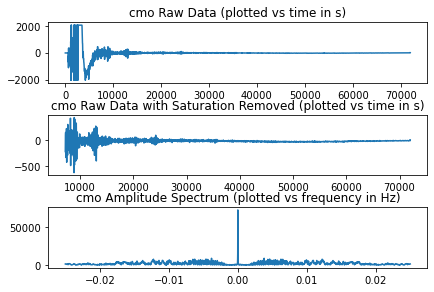

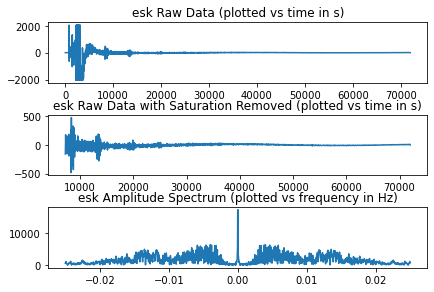

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

cmoData = np.array([])
eskData = np.array([])

with open('cmo.csv', newline='') as File:
    reader = csv.reader(File)
    for row in reader:
        cmoData = np.append(cmoData, [float(row[0])])

with open('esk.csv', newline='') as File:
    reader = csv.reader(File)
    for row in reader:
        eskData = np.append(eskData, [float(row[0])])

N = len(cmoData)
t = np.linspace(0, 20*N, N)


# QUESTION 1 A
fig1, cmo1a = plt.subplots(3)
fig2, esk1a = plt.subplots(3)
fig1.tight_layout()
fig2.tight_layout()

cmo1a[0].plot(t, cmoData)
cmo1a[0].set_title('cmo Raw Data (plotted vs time in s)')
esk1a[0].plot(t, eskData)
esk1a[0].set_title('esk Raw Data (plotted vs time in s)')

# 2 hours is 360 20s samples, so I removed the first 360 elements of each array
cmoUnsaturatedData = np.delete(cmoData, np.arange(0, 360))
eskUnsaturatedData = np.delete(eskData, np.arange(0, 360))
t = np.delete(t, np.arange(0, 360))

cmo1a[1].plot(t, cmoUnsaturatedData)
cmo1a[1].set_title('cmo Raw Data with Saturation Removed (plotted vs time in s)')
esk1a[1].plot(t, eskUnsaturatedData)
esk1a[1].set_title('esk Raw Data with Saturation Removed (plotted vs time in s)')

N2 = N-360
fn = np.fft.fftfreq(N2, 20)
cmoTransform = np.fft.fft(cmoUnsaturatedData)
eskTransform = np.fft.fft(eskUnsaturatedData)

cmo1a[2].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(cmoTransform)))
cmo1a[2].set_title('cmo Amplitude Spectrum (plotted vs frequency in Hz)')
esk1a[2].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(eskTransform)))
esk1a[2].set_title('esk Amplitude Spectrum (plotted vs frequency in Hz)')
plt.show()

<html>
<ol start="2", style = "list-style-type:lower-alpha;">
    <li>Can you see the Earth tides now in this clipping-free data? To filter out the tides, estimate their dominant frequency (i.e. periods of roughly 6-12 hrs) and consider the range of frequencies represented in the first few points of the Fourier transform of the data (i.e. <code>fn = np.fft.fftfreq(N, dt)</code> for even N). Don’t forget that you need to delete both negative and positive frequencies in the Fourier spectrum. As suggested, filter out the tides and examine your “clean” seismogram. Include both time domain (versus time) and frequency domain (versus frequency) plots of the “cleaned” data. Comment on the difference between the tide-saturated
and tide-free time series and amplitude spectrum plots.</li>
</ol>
</html>

C:\Users\ggues\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ggues\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


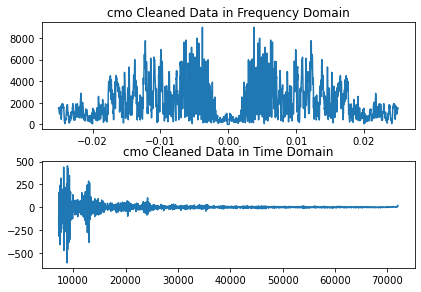

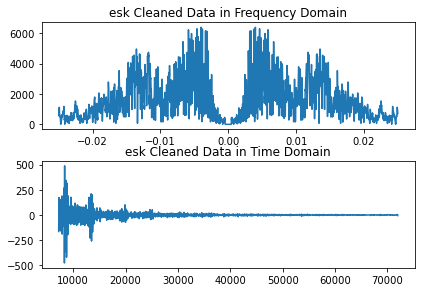

In [2]:
# QUESTION 1 B

fig3, cmo1b = plt.subplots(2)
fig4, esk1b = plt.subplots(2)
fig3.tight_layout()
fig4.tight_layout()

cmoTransform[0:10] = 0
cmoTransform[N2-10:N2] = 0
eskTransform[0:30] = 0
eskTransform[N2-30:N2] = 0

cmo1b[0].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(cmoTransform)))
cmo1b[0].set_title('cmo Cleaned Data in Frequency Domain')
esk1b[0].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(eskTransform)))
esk1b[0].set_title('esk Cleaned Data in Frequency Domain')

cmoCleanData = np.fft.ifft(cmoTransform)
eskCleanData = np.fft.ifft(eskTransform)

cmo1b[1].plot(t, cmoCleanData)
cmo1b[1].set_title('cmo Cleaned Data in Time Domain')
esk1b[1].plot(t, eskCleanData)
esk1b[1].set_title('esk Cleaned Data in Time Domain')
plt.show()


<html>
<ol start="3", style = "list-style-type:lower-alpha;">
    <li>The bursts of energy are surface waves that have travelled repeatedly round the great circle path through Oaxaca, Mexico and College, Alaska. Remember that every other burst of energy has travelled in opposite directions; if $c_R$ is the Rayleigh wave speed, $r_E$ the Earth’s radius, and $\Delta$ the angular distance between event and station, the first wavetrain arrives after a time $r_E{\Delta}/c_R$, the second after time $r_E(2{\pi} − {\Delta})/c_R$, etc. Although you have lost the first few arriving wavetrains due to instrument saturation, you can still estimate the distance ${\Delta}$ and, given $r_E = 6371$ km, Rayleigh wave speed $c_R$. Find these two values. Choose the first 4 bursts of energy and look at the differences in timing between the bursts to figure out the distance ${\Delta}$ and Rayleigh wave velocity. You will have to determine which are the more important relative timing bursts to use.) Please hand in a time-domain plot indicating where you took your times $(T_1, T_2, T_3, T_4)$ and the work required to compute $\Delta$ and $c_R$.</li>
</ol>
</html>

<html>
<p style="margin-left:25px">
You can use the following code to determing the timing of the surface wave "bursts" on the seismograms:
</p>
</html>

In [13]:
%matplotlib qt 
#interactive plotting in a separate window
def on_pick(event):
    artist = event.artist
    xmouse, ymouse = event.mouseevent.xdata, event.mouseevent.ydata
    x, y = artist.get_xdata(), artist.get_ydata()
    ind = event.ind
    print('Data point:', x[ind[0]], y[ind[0]])

x = t
y = np.real(cmoCleanData)

fig, ax = plt.subplots()

tolerance = 10
ax.plot(x, y, picker=tolerance) #plot your x and y data here

fig.canvas.callbacks.connect('pick_event', on_pick)

plt.show()
#revert to %matplotlib inline when you are done

Data point: 21646.012781328147 11.990318955977129


C:\Users\ggues\miniconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


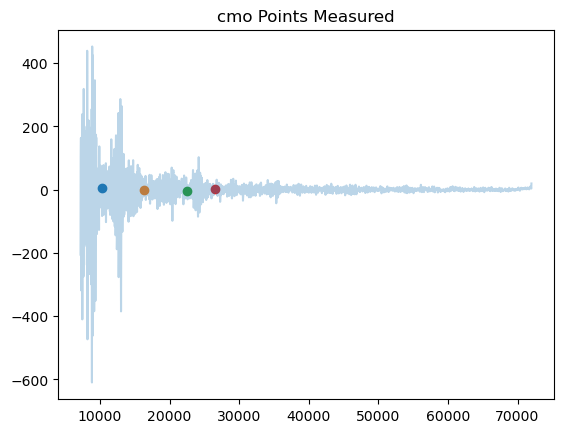

C:\Users\ggues\miniconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


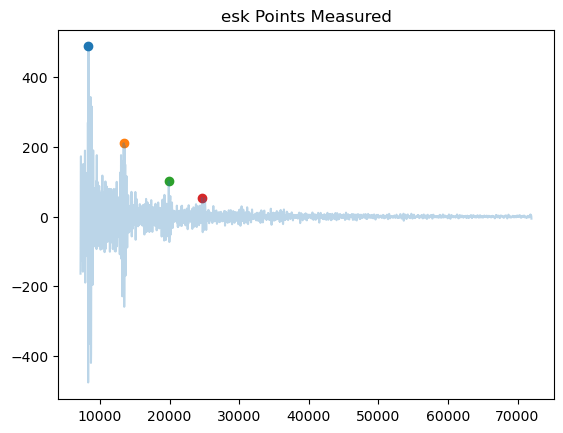

In [7]:
# QUESTION 1 C
%matplotlib inline #revert back to normal graphs inside notebooks

plt.plot(t, np.real(cmoCleanData), alpha=0.3)
plt.scatter(t[153], cmoCleanData[153])
plt.scatter(t[455], cmoCleanData[455])
plt.scatter(t[764], cmoCleanData[764])
plt.scatter(t[969], cmoCleanData[969])
plt.title('cmo Points Measured')
plt.show()

plt.plot(t, np.real(eskCleanData), alpha = 0.3)
plt.scatter(t[57], eskCleanData[57])
plt.scatter(t[310], eskCleanData[310])
plt.scatter(t[634], eskCleanData[634])
plt.scatter(t[872], eskCleanData[872])
plt.title('esk Points Measured')
plt.show()


<html>
<ol start="4", style = "list-style-type:lower-alpha;">
    <li>As in d. on page 64 of TSAITG, identify the peaks in the frequency range 1.9-3.0 mHz and measure their frequencies on your tide-free amplitude spectrum plot. Compare the frequencies you observe with those predicted in the text book, and identify the modes. Before you take the <code>np.fft.fft</code> of the time series you will want to first window it with an appropriate taper window to avoid spectral leakage, and then pad with zeros. Use the Hann window which for a time series with $N$ points as defined by <code>0.5*(1-np.cos(2*np.pi*(np.arange(0, N, 1))/(N-1)))</code>. Compare the spectrum computed in this way with the spectrum you get with no taper (e.g. using a boxcar window function). Then compare your results with the predicted frequencies that are provided in the book. Include both the tapered and non-tapered amplitude spectrums plotted versus frequency, with comments on the difference between the two. Also include the normal mode frequencies that you determined from your amplitude spectrum (include a detailed, zoomed in plot of the frequency range to demonstrate that the normal modes are present)</li>
</ol>
</html>

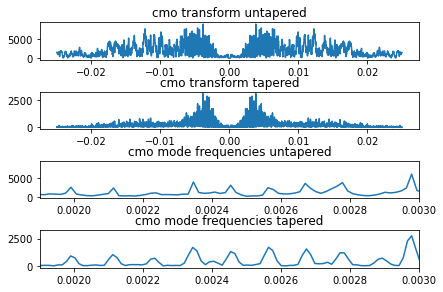

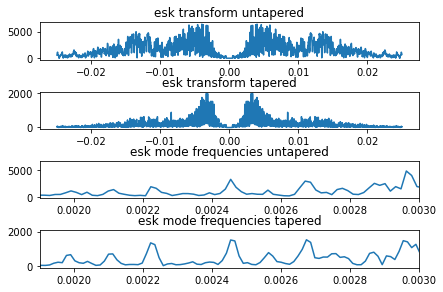

In [8]:
# QUESTION 1 D

hannWindow = 0.5*(1-np.cos(2*np.pi*(np.arange(0, N2, 1))/(N2-1)))
cmoTaperedData = cmoCleanData*hannWindow
eskTaperedData = eskCleanData*hannWindow

N3 = 2**12
fn3 = np.fft.fftfreq(N3, 20)
cmoPaddedTaperedData = np.pad(cmoTaperedData, (0, N3-len(cmoTaperedData)))
eskPaddedTaperedData = np.pad(eskTaperedData, (0, N3-len(eskTaperedData)))

cmoCleanTransform = np.fft.fft(cmoCleanData)
eskCleanTransform = np.fft.fft(eskCleanData)

cmoPaddedTaperedTransform = np.fft.fft(cmoPaddedTaperedData)
eskPaddedTaperedTransform = np.fft.fft(eskPaddedTaperedData)

fig5, cmoTransforms = plt.subplots(4)
fig5.tight_layout()

cmoTransforms[0].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(cmoCleanTransform)))
cmoTransforms[0].set_title('cmo transform untapered')
cmoTransforms[1].plot(np.fft.fftshift(fn3), np.fft.fftshift(np.abs(cmoPaddedTaperedTransform)))
cmoTransforms[1].set_title('cmo transform tapered')
cmoTransforms[2].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(cmoCleanTransform)))
cmoTransforms[2].set_title('cmo mode frequencies untapered')
cmoTransforms[2].set_xlim([0.0019, 0.003])
cmoTransforms[3].plot(np.fft.fftshift(fn3), np.fft.fftshift(np.abs(cmoPaddedTaperedTransform)))
cmoTransforms[3].set_title('cmo mode frequencies tapered')
cmoTransforms[3].set_xlim([0.0019, 0.003])
plt.show()

fig6, eskTransforms = plt.subplots(4)
fig6.tight_layout()

eskTransforms[0].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(eskCleanTransform)))
eskTransforms[0].set_title('esk transform untapered')
eskTransforms[1].plot(np.fft.fftshift(fn3), np.fft.fftshift(np.abs(eskPaddedTaperedTransform)))
eskTransforms[1].set_title('esk transform tapered')
eskTransforms[2].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(eskCleanTransform)))
eskTransforms[2].set_title('esk mode frequencies untapered')
eskTransforms[2].set_xlim([1.9E-3, 3E-3])
eskTransforms[3].plot(np.fft.fftshift(fn3), np.fft.fftshift(np.abs(eskPaddedTaperedTransform)))
eskTransforms[3].set_title('esk mode frequencies tapered')
eskTransforms[3].set_xlim([1.9E-3, 3E-3])
plt.show()

<html>
<ol start="5", style = "list-style-type:lower-alpha;">
    <li>Repeat this process with the data from station ESK. Note that we have removed the glitches from the record that is referred to in the text so that you don't have to worry about them.</li>
</ol>
</html>

2. Problem 4.1 on page 77 of TSAITG. A low-pass Butterworth filter has amplitude spectrum
$$
\lvert A({\omega})\rvert^2=\frac{1}{1+({\omega}/{\omega}_c)^n}
$$
For ${\omega}_c=2{\pi}$ find the amplitudes at ${\omega}=4{\pi},6{\pi},8{\pi}$ for $n=1,2,3$. How does the value of $n$ affect the frequency content of the output above the cut-off?

3. Problem 4.3 on page 77 of TSAITG.
<html>
<ol start="1", style = "list-style-type:lower-alpha;">
    <li>Is the sequence $(2,-3,-3,2)$ minimum phase? If not, find the minimum phase sequence with the same amplitude spectrum.</li>
    <li>Verify by direct calculation that the autocorrelations of the two sequences are the same. This is a general result: why?</li>
    <li>For each sequence calculate the partial sums
$$
S_p=\sum_{k=0}^{p}a_k^2; p=0,1,2,3
$$
to show the minimum phase sequence has more of its energy concentrated at the front.</li>
</ol>
</html>